# EDA-Project 3

Это ваш третий проект из второго блока курса Data Science. 
Вам предоставляется следующий файл: ```"netflix_titles.csv"```.

Сделайте EDA по данным. 
Перечислите вопросы, которые вы считаете важными. Затем попробуйте ответить на каждый вопрос, с визуализации. Пожалуйста, сделайте ваш код чистым, а аргументы понятными.


## 1. Импорт и обработка данных

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
netflix = pd.read_csv('netflix_titles.csv')

In [3]:
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [5]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
from datetime import datetime
netflix['date_added'] = netflix['date_added'].apply(lambda x: pd.to_datetime(netflix['date_added']).max() if pd.isna(x) else pd.to_datetime(x))
netflix['year_added'] = netflix['date_added'].apply(lambda x: '-' if x=='-' else int(x.year))
netflix['month_added'] = netflix['date_added'].apply(lambda x: '-' if x=='-' else x.strftime('%B'))
netflix['day_added'] = netflix['date_added'].apply(lambda x: '-' if x=='-' else int(x.day))
netflix['weekday_added'] = netflix['date_added'].apply(lambda x: '-' if x=='-' else x.strftime('%A'))
for col in netflix.columns:
    netflix[col] = netflix[col].apply(lambda x: '-' if pd.isna(x) else x)

In [7]:
netflix.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,weekday_added
6229,80000063,TV Show,Red vs. Blue,-,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,2020-01-18,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",2020,January,18,Saturday
6230,70286564,TV Show,Maron,-,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,2020-01-18,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",2020,January,18,Saturday
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,-,-,-,2020-01-18,2016,-,60 min,Movies,Nursery rhymes and original music for children...,2020,January,18,Saturday
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,-,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2020-01-18,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",2020,January,18,Saturday
6233,70153404,TV Show,Friends,-,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,2020-01-18,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,2020,January,18,Saturday


In [8]:
netflix.country[netflix.country!='-'].value_counts()[:10]

United States     2032
India              777
United Kingdom     348
Japan              176
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Turkey              79
Name: country, dtype: int64

## 2. Визализация

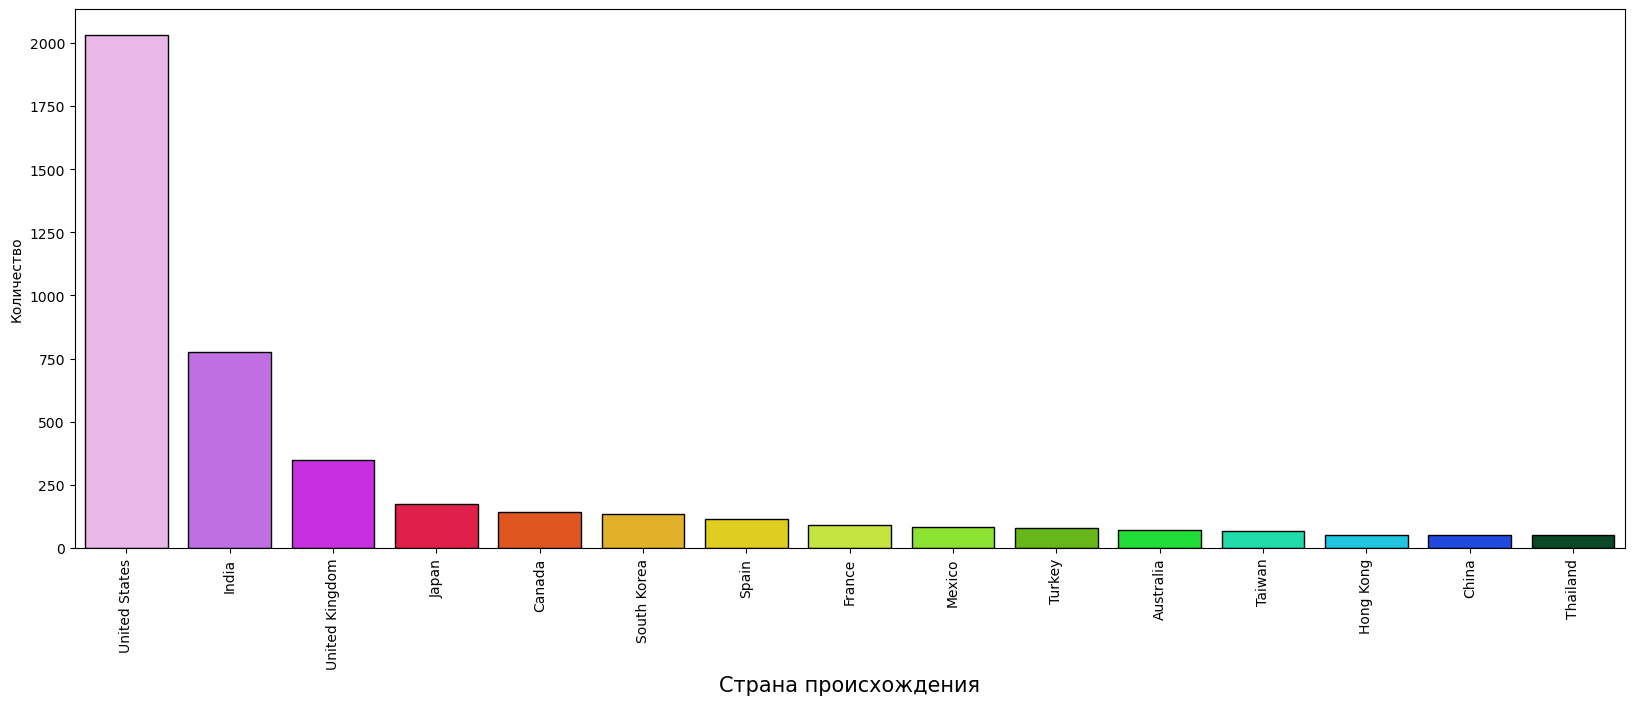

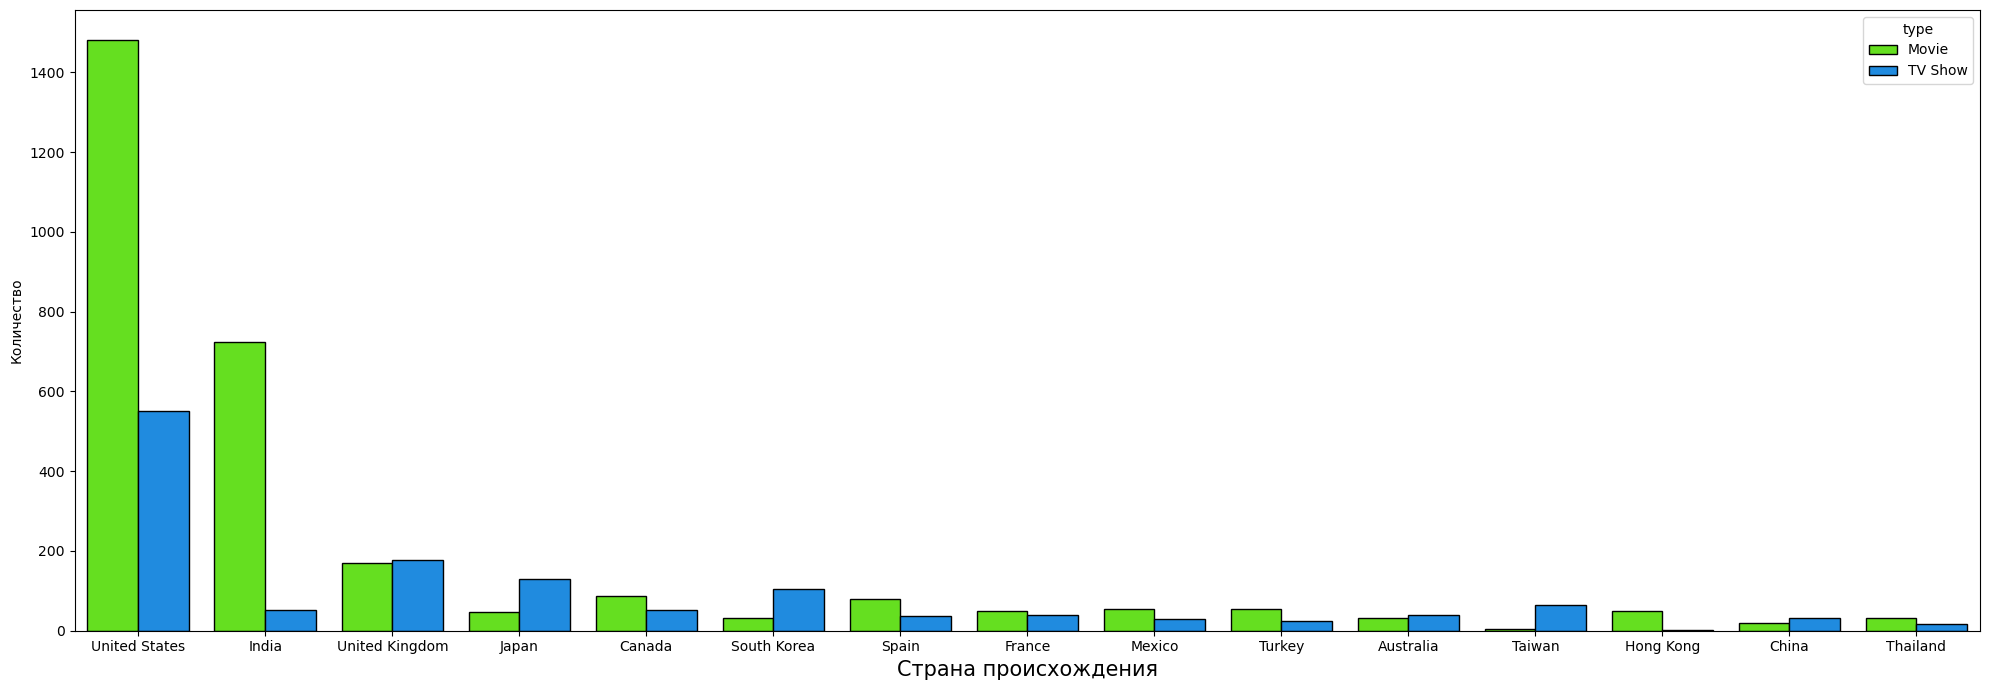

In [9]:
plt.rcParams['figure.figsize'] = (20,7)
sns.countplot(data=netflix[netflix['country']!='-'], 
              order=netflix['country'][netflix['country']!='-'].value_counts().index[:15], 
              x='country', palette='gist_ncar_r', ec='k')
plt.xlabel('Страна происхождения', size=15)
plt.ylabel('Количество')
plt.xticks(rotation=90)
plt.show()
sns.countplot(data=netflix[netflix['country']!='-'], 
              order=netflix['country'][netflix['country']!='-'].value_counts().index[:15], 
              x='country', palette='gist_rainbow', ec='k', hue='type')
plt.xlabel('Страна происхождения', size=15)
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

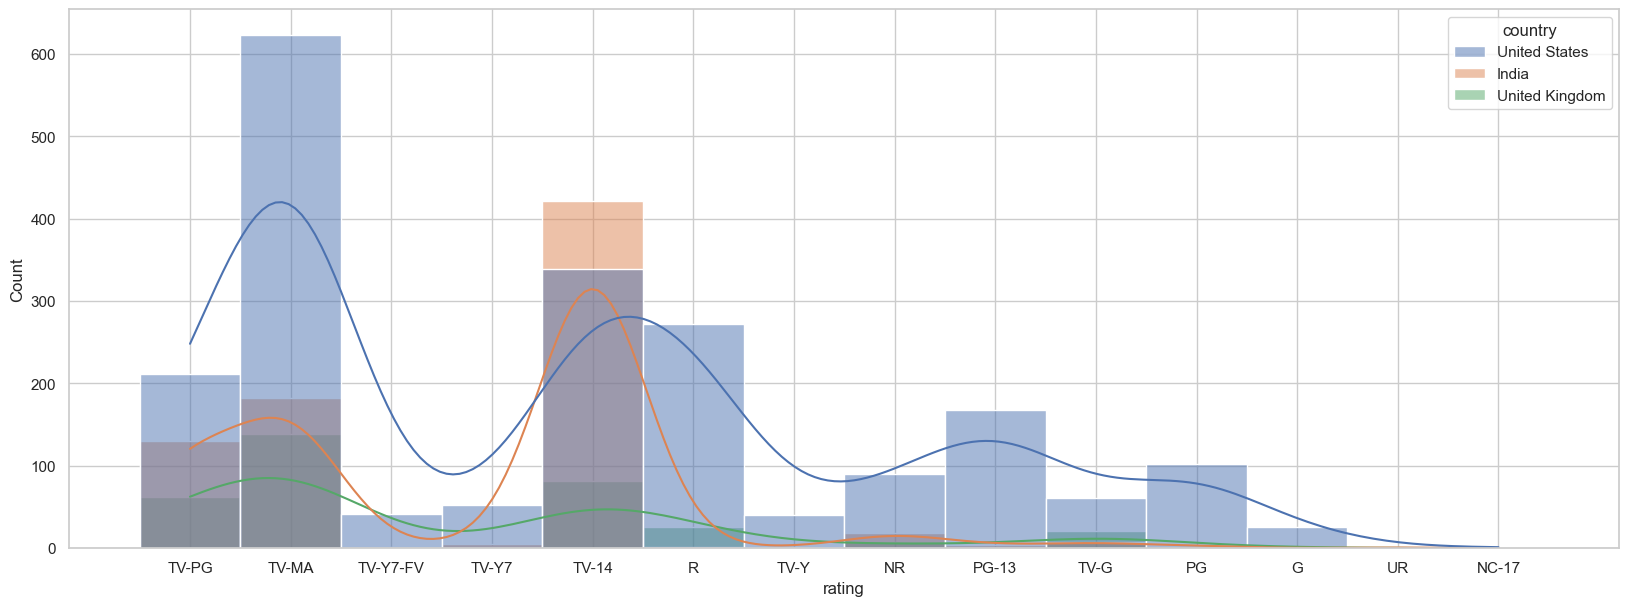

In [10]:
sns.set(style='whitegrid')
sns.histplot(data=netflix[netflix['rating']!='-'],
             x='rating', kde=True, color='orange', hue='country',
            hue_order=netflix['country'][netflix['country']!='-'].value_counts().index[:3]);

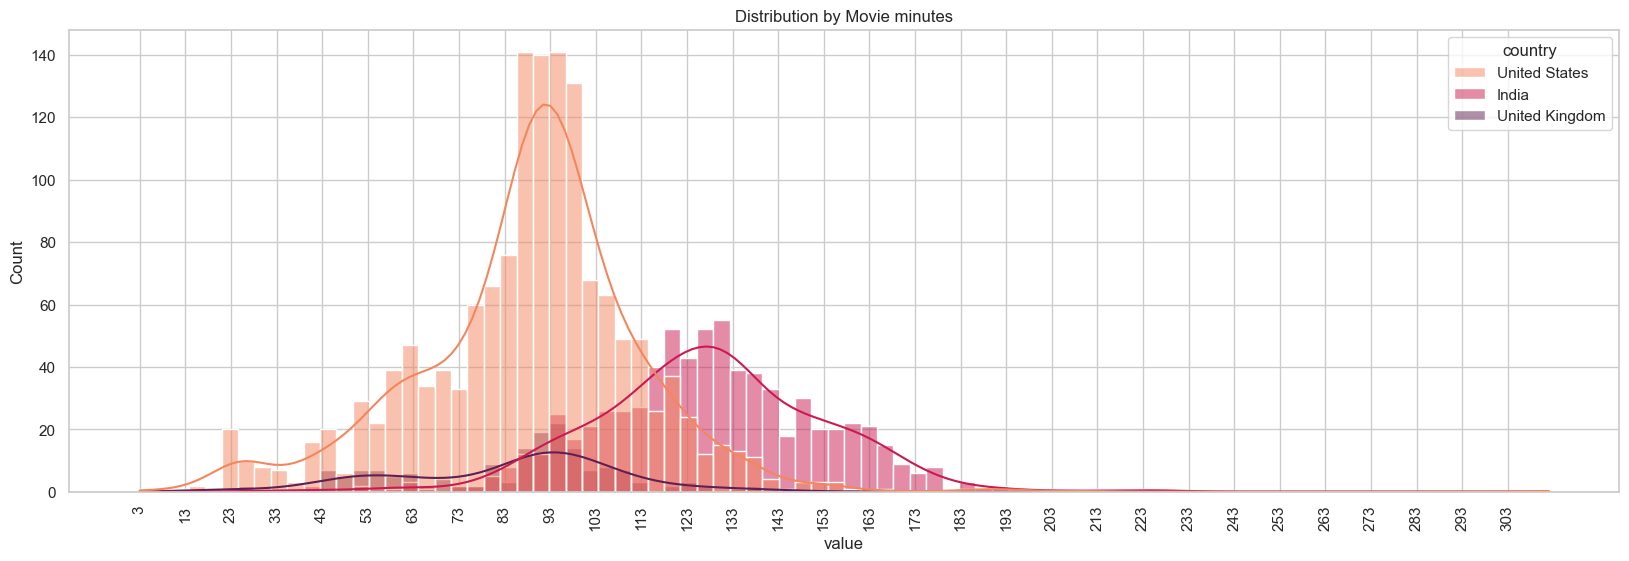

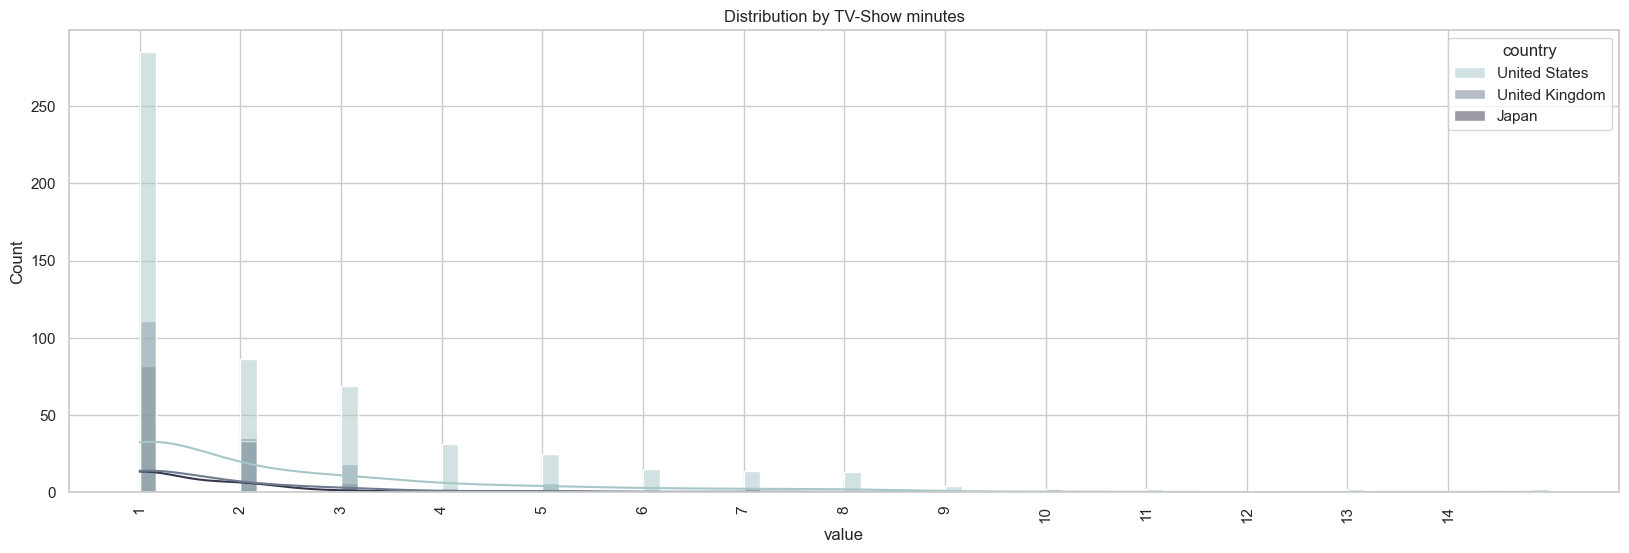

In [16]:
import warnings
warnings.filterwarnings('ignore')
movies = netflix.query('type=="Movie" and country!="-"')
movies.loc[:, "duration"] = movies["duration"].apply(lambda x: int(x.replace('min','')))
movies_long = pd.melt(movies[movies["duration"]!='-'], id_vars=['country'], value_vars=['duration'])
sns.histplot(movies_long, x='value', kde=True, color='red', hue='country',
             hue_order=movies['country'].value_counts().index[:3], palette='rocket_r')
plt.xticks(np.arange(min(movies['duration'][movies["duration"]!='-']),
                     max(movies['duration'][movies["duration"]!='-']), 10), rotation=90)
plt.title('Distribution by Movie minutes')
plt.show()
tv_show = netflix.query('type=="TV Show" and country!="-"')
tv_show.loc[:, "duration"] = tv_show["duration"].apply(lambda x: int(x.replace(' Seasons','').replace(' Season','')))
tv_show_long = pd.melt(tv_show[tv_show["duration"]!='-'], id_vars=['country'], value_vars=['duration'])
sns.histplot(tv_show_long, x='value', kde=True, color='red', hue='country',
             hue_order=tv_show['country'].value_counts().index[:3], palette='bone_r')
plt.xticks(np.arange(min(tv_show['duration'][tv_show["duration"]!='-']),
                     max(tv_show['duration'][tv_show["duration"]!='-']), 1), rotation=90)
plt.title('Distribution by TV-Show minutes')
plt.show()

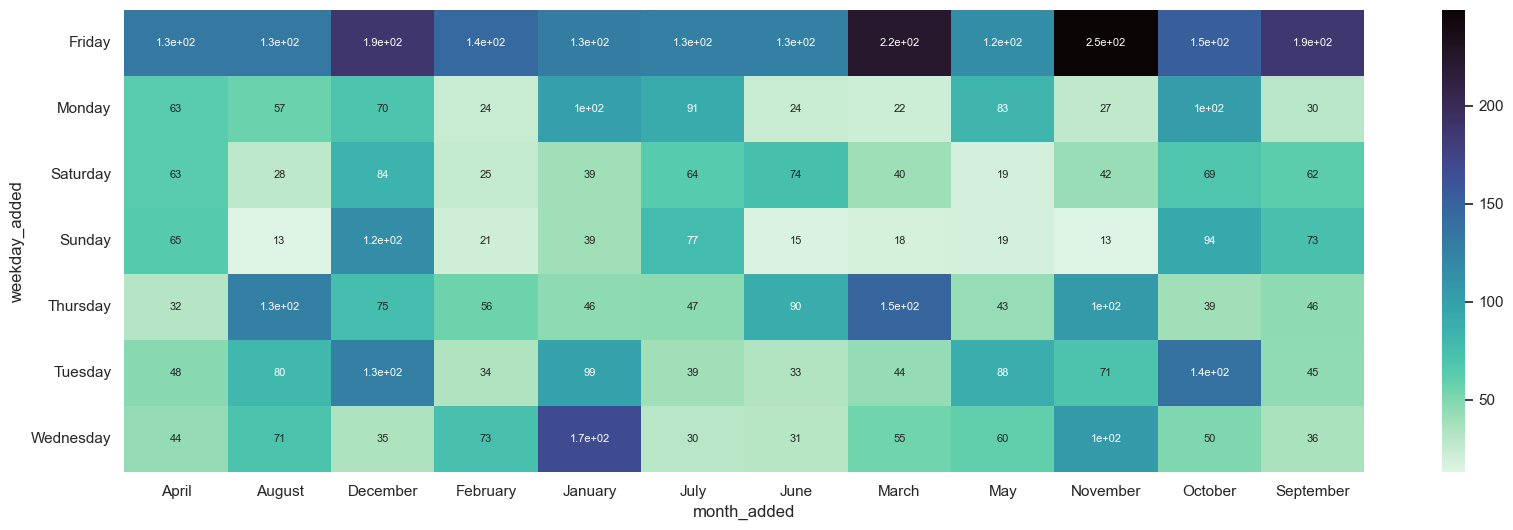

In [12]:
plt.rcParams['figure.figsize'] = (20,6)
pivot = pd.pivot_table(netflix, values="show_id", index="weekday_added", columns="month_added", aggfunc="count")
sns.heatmap(pivot, annot=True, annot_kws={"fontsize": 8}, cmap='mako_r');

In [13]:
m = list(netflix[netflix['weekday_added']=='Friday']['month_added'].value_counts().index[:2])

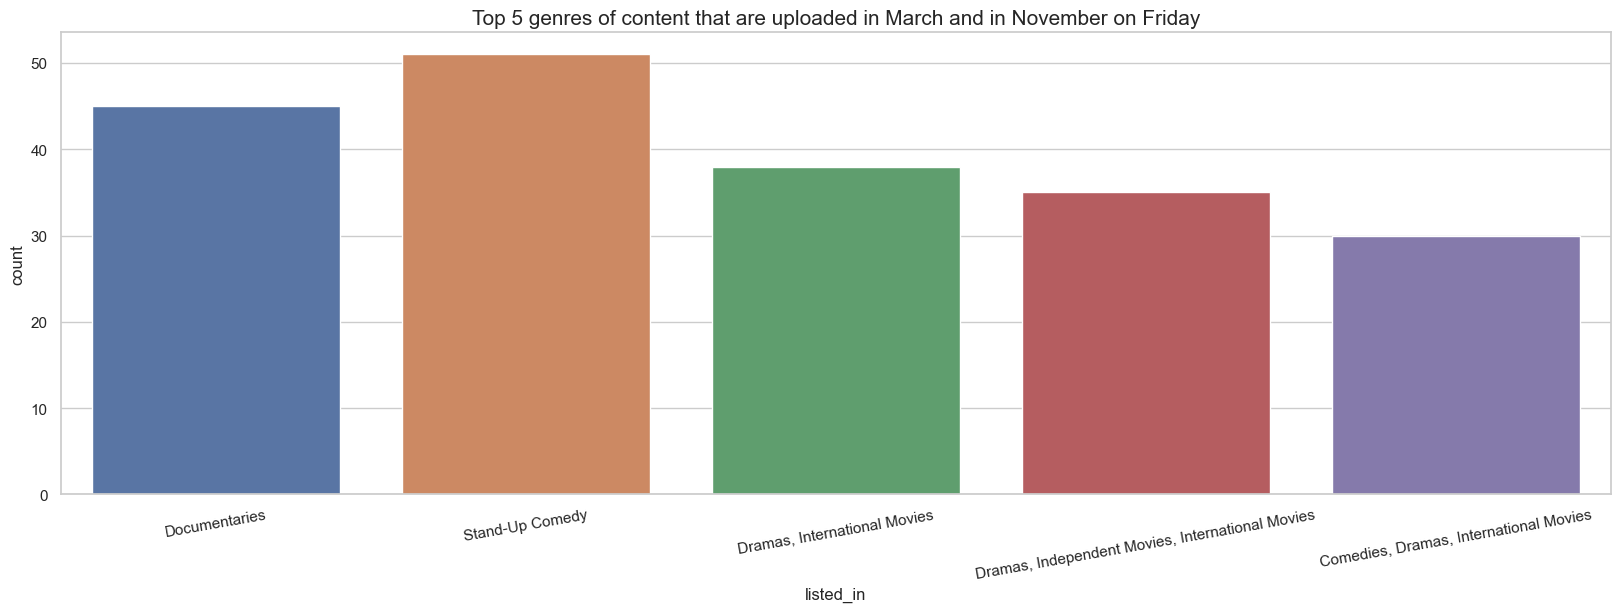

In [14]:
sns.countplot(data=netflix[netflix['month_added'].isin(m)], 
              x='listed_in', order=netflix['listed_in'].value_counts().index[:5])
plt.title('Top 5 genres of content that are uploaded in March and in November on Friday', size=15)
plt.xticks(rotation=10);

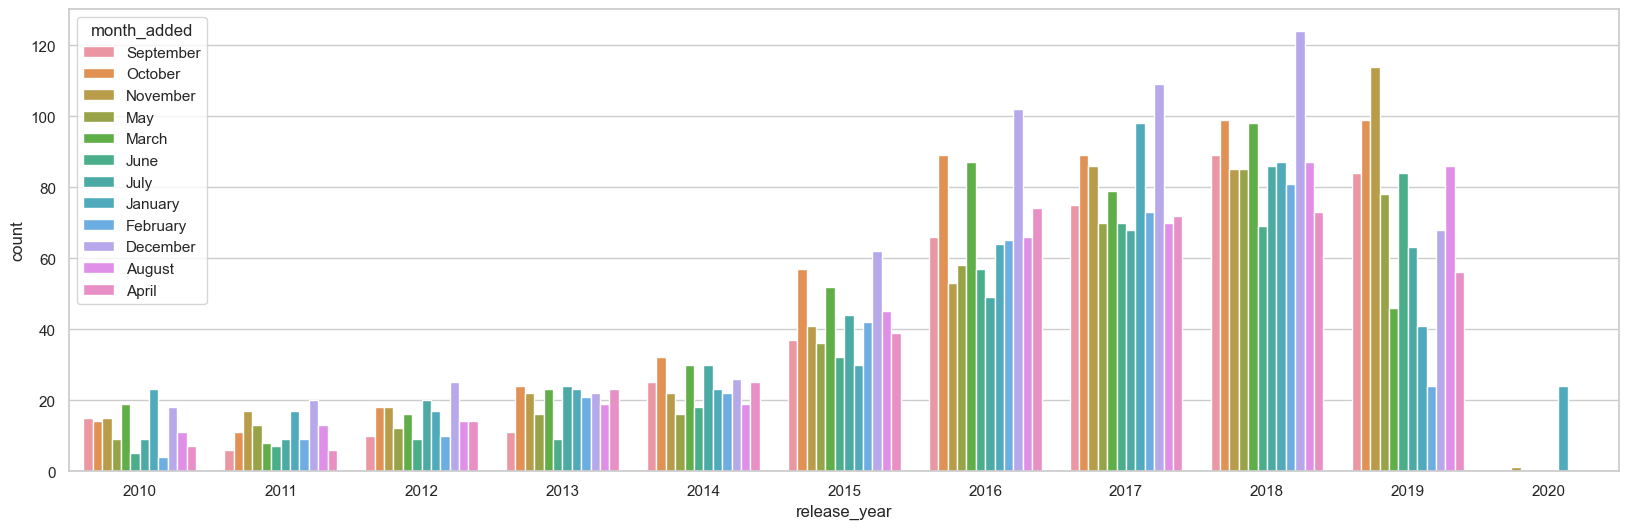

In [15]:
sns.countplot(data=netflix[(netflix['release_year']>=2010)&
                           (netflix['release_year']<=2020)], x='release_year', hue='month_added');

## Заключение

По анализу мы выявили 3 гигантов в киноиндустрии, а также популярные рейтинги, продожительность и сезонность контентов в этих странах. Вывели графики по количеству реализации видео продуктов по дням недели и помесячно, топ-5 жанров в этом интервали. Анализировали по количество реализации за последнюю декаду помесячно и выявили причину регрессии за последний год.